# PAP2 Versuch 242: Spannungsverstärkung

Aufgabe 1a: Gleichspannungsverstärkung

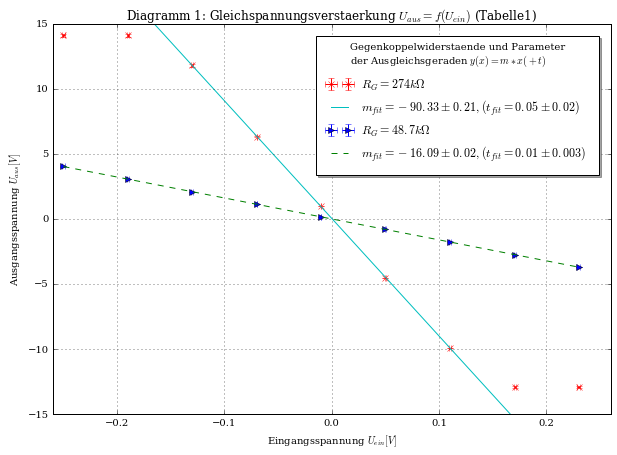

In [35]:
#Aufgabe 1a: Gleichspannungsverstärkung

#Import von allen benötigten Modulen
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Manuelles Setzen der Größe des Plots
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams["font.family"]='serif'

#Einlesen der Daten aus Tabelle 1
U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err = np.loadtxt('tab1.txt', skiprows=1, usecols=(0,1,2,3,4,5), unpack=True)

# Definition der Ausgleichsgerade y=f(x)
def f(x, A, B): 
    return A*x + B

#Bester Fit an die Geraden 
popt1, pcov1 = curve_fit(f, U_ein, U_aus1) # Gerade 1
popt2, pcov2 = curve_fit(f, U_ein[2:-2], U_aus2[2:-2]) # Gerade 2
#In Gerade zwei Werte ausgenommen, weil nur linearer Teil betrachtet

#Abweichung ist Wurzel aus Diagonalelementen der Kovarianzmatrix
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))

#Indizierung des Plots für späteren Zugriff
fig,ax = plt.subplots(1)

#Zeichnen der Messwerte mit Fehler und Plot
#Zuerst für Gerade 1 (untere Gerade im Plot)
ax.errorbar(U_ein, U_aus1, linestyle='None', marker='>', label='$R_{G}=48.7 k\Omega$', xerr=ein_err, yerr=aus1_err)
ax.plot(U_ein, f(U_ein, *popt1), linestyle='--', label='$m_{fit}=%.2f \pm%.2f, (t_{fit}=%.2f \pm%.3f)$' %(popt1[0], perr1[0], popt1[1], perr1[1]))

#Jetzt für Gerade 2 (obere Gerade im Plot)
ax.errorbar(U_ein, U_aus2, linestyle='None', marker='x', label='$R_{G}=274 k\Omega$', xerr=ein_err, yerr=aus2_err)
ax.plot(U_ein, f(U_ein, *popt2), label='$m_{fit}=%.2f \pm%.2f, (t_{fit}=%.2f \pm%.2f)$' %(popt2[0], perr2[0], popt2[1], perr2[1]))

#Eigenschaften des Plots: Achsen, Beschriftungen, Gitternetz
plt.xlabel('Eingangsspannung $U_{ein} [V]$')
plt.ylabel('Ausgangsspannung $U_{aus} [V]$')
plt.title('Diagramm 1: Gleichspannungsverstaerkung $U_{aus}=f(U_{ein})$ (Tabelle1)')
plt.ylim((-15,15))
plt.xlim((-0.26, 0.26))
plt.grid(True)

#Manuelles sortieren der Einträge in der Legende
handles,labels = ax.get_legend_handles_labels()
handles = [handles[3], handles[1], handles[2], handles[0]]
labels = [labels[3], labels[1], labels[2], labels[0]]
ax.legend(handles, labels, title='Gegenkoppelwiderstaende und Parameter\nder Ausgleichsgeraden $y(x)=m*x(+t)$', borderpad=1, borderaxespad=1, loc='best', shadow='true')

#Speichern des Plots
plt.savefig('V242_A1a.png', dpi=300)

Aufgabe 1b: Wechselspannungsverstärkung

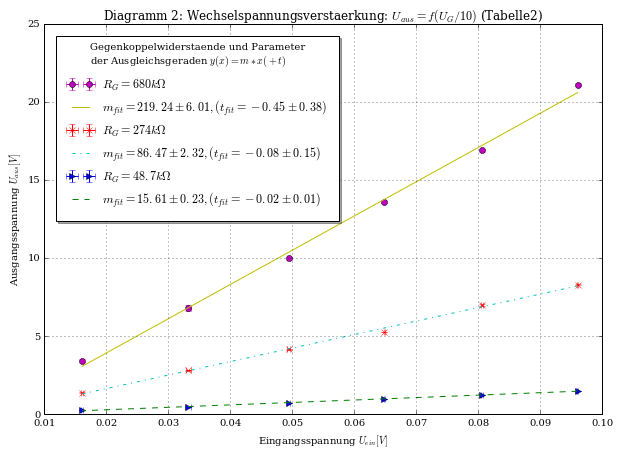

In [38]:
#Aufgabe 1b: Wechselspannungsverstärkung

#Import von allen benötigten Modulen
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Manuelles Setzen der Größe des Plots
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams["font.family"]='serif'

#Einlesen der Daten aus Tabelle 2
U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err, U_aus3, aus3_err = np.loadtxt('tab2.txt', skiprows=1, usecols=(0,1,2,3,4,5,6,7), unpack=True)

#Rückrechnen der Untersetzen Spannungen
U_ein = U_ein/10
ein_err = ein_err/10

# Definition der Ausgleichsgerade y=f(x)
def f(x, A, B): 
    return A*x + B

#Bester Fit an die Geraden 
popt1, pcov1 = curve_fit(f, U_ein, U_aus1) # Fit für Gerade 1
popt2, pcov2 = curve_fit(f, U_ein, U_aus2) # Fit für Gerade 2
popt3, pcov3 = curve_fit(f, U_ein, U_aus3) # Fit für Gerade 3

#Abweichung ist Wurzel aus Diagonalelementen der Kovarianzmatrix
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))

#Indizierung des Plots für späteren Zugriff
fig,ax = plt.subplots(1)

#Plot Gerade 1 mit Ausgleichsgerade
ax.errorbar(U_ein, U_aus1, linestyle='None', marker='>', label='$R_{G}=48.7 k\Omega$', xerr=ein_err, yerr=aus1_err)
ax.plot(U_ein, f(U_ein, *popt1), linestyle='--', label='$m_{fit}=%.2f \pm%.2f, (t_{fit}=%.2f \pm%.2f)$' %(popt1[0], perr1[0], popt1[1], perr1[1]))

#Plot Gerade 2 mit Auslgeichsgerade
ax.errorbar(U_ein, U_aus2, linestyle='None', marker='x', label='$R_{G}=274 k\Omega$', xerr=ein_err, yerr=aus2_err)
ax.plot(U_ein, f(U_ein, *popt2), linestyle='-.', label='$m_{fit}=%.2f \pm%.2f, (t_{fit}=%.2f \pm%.2f)$' %(popt2[0], perr2[0], popt2[1], perr2[1]))

#Plot Gerade 3 mit Auslgeichsgerade
ax.errorbar(U_ein, U_aus3, linestyle='None', marker='o', label='$R_{G}=680 k\Omega$', xerr=ein_err, yerr=aus3_err)
ax.plot(U_ein, f(U_ein, *popt3), linestyle='-', label='$m_{fit}=%.2f \pm%.2f, (t_{fit}=%.2f \pm%.2f)$' %(popt3[0], perr3[0], popt3[1], perr3[1]))

#Sortieren der Eingträge der Legende
handles,labels = ax.get_legend_handles_labels()
handles = [handles[5], handles[2], handles[4], handles[1], handles[3], handles[0]]
labels = [labels[5], labels[2], labels[4], labels[1], labels[3], labels[0]]

#Achsenbeschriftungen
plt.grid(True)
plt.xlabel('Eingangsspannung $U_{ein} [V]$')
plt.ylabel('Ausgangsspannung $U_{aus} [V]$')
plt.title('Diagramm 2: Wechselspannungsverstaerkung: $U_{aus}=f(U_{G}/10)$ (Tabelle2)')
ax.legend(handles, labels, title='Gegenkoppelwiderstaende und Parameter\nder Ausgleichsgeraden $y(x)=m*x(+t)$', borderpad=1, borderaxespad=1, loc='best', shadow='true')

#Speichern des Plots
plt.savefig('V242_A1b.png', dpi=300)

Aufgabe 2: Frequenzgang mit Gegenkopplungen und Kondensator

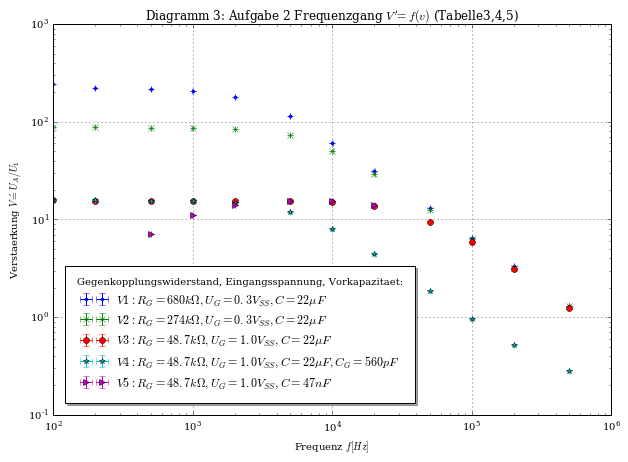

In [51]:
#Aufgabe 2: Frequenzgang

#Import von allen benötigten Modulen
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Manuelles Setzen der Größe des Plots
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams["font.family"]='serif'

#Einlesen der Daten aus Tabelle 3
f, f_err, U_A1, A1_err, U_A2, A2_err, U_A3, A3_err, U_A4, A4_err, U_A5, A5_err = np.loadtxt('tab3.txt', skiprows=1, usecols=(0,1,2,3,4,5,6,7,8,9,10,11), unpack=True)

#Zurückrechnen der Untersetzten Spannung
U_A1 = U_A1/0.3
U_A2 = U_A2/0.3

#Plotten aller Kurven
plt.errorbar(f, U_A1*10, linestyle='None', marker='.', label='$V1: R_{G}=680 k\Omega, U_{G}=0.3 V_{SS}, C=22 \mu F$', xerr=f_err, yerr=A1_err)
plt.errorbar(f, U_A2*10, linestyle='None', marker='x', label='$V2: R_{G}=274 k\Omega, U_{G}=0.3 V_{SS}, C=22 \mu F$ ', xerr=f_err, yerr=A2_err)
plt.errorbar(f, U_A3*10, linestyle='None', marker='o', label='$V3: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=22 \mu F$', xerr=f_err, yerr=A3_err)
plt.errorbar(f, U_A4*10, linestyle='None', marker='*', label='$V4: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=22 \mu F, C_{G}=560 pF$', xerr=f_err, yerr=A4_err)
plt.errorbar(f, U_A5*10, linestyle='None', marker='>', label='$V5: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=47 nF$', xerr=f_err, yerr=A5_err)

#Achsenbeschriftungen des Plots
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Frequenz $f  [Hz]$ ')
plt.ylabel(r'Verstaerkung $V\'={U_{A}}/{U_{1}}$') #frac{U_{aus}}{\frac{1}{10}\U_{G}
plt.title('Diagramm 3: Aufgabe 2 Frequenzgang $V\'=f(v)$ (Tabelle3,4,5)')
plt.legend(title='Gegenkopplungswiderstand, Eingangsspannung, Vorkapazitaet:', borderpad=1, borderaxespad=1, loc='lower left', shadow='true')

#Speichern des Plots
plt.savefig('V242_A2.png', dpi=300)